# Домашнее задание
1. Скачать датасет с фразами симпосонов - https://github.com/sujanjoejacob/Text-mining-with-Simpsons-Data
2. Обучить word2vec на фразах персонажей
3. Визуализировать embeddings по самым частотным словам (top 1000)
4. Найти самые близкие слова для:
    homer - marge + bart  
    bart - lisa + school  
    marge - homer + home  
5* попробовать построить классификатор bart/lisa с использованием этих эмбеддингов

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# getting data 
cols = ['id', 'episode_id', 'number', 'raw_text', 'timestamp_in_ms', 'speaking_line',
        'character_id', 'location_id', 'raw_character_text', 'raw_location_text',
        'spoken_words', 'normalized_text', 'word_count']
df = pd.read_csv("../data/simpsons_script_lines.csv"
                ,names = cols
                ,error_bad_lines=False
                ,warn_bad_lines=False
                ,low_memory=False
                )
df = df.dropna()
print(f'Total len without NaN : {len(df)}')

Total len without NaN : 131709


In [3]:
df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
1,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,true,464,3,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
2,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,true,9,3,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
3,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,true,464,3,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
4,9552,32,212,Lisa Simpson: That life is worth living.,864000,true,9,3,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5


In [4]:
corpus = df.iloc[1:, :].normalized_text.apply(lambda x : x.split())

In [5]:
corpus.head()

1    [no, actually, it, was, a, little, of, both, s...
2                              [wheres, mr, bergstrom]
3    [i, dont, know, although, id, sure, like, to, ...
4                      [that, life, is, worth, living]
5    [the, polls, will, be, open, from, now, until,...
Name: normalized_text, dtype: object

In [6]:
from gensim.models import Word2Vec

unable to import 'smart_open.gcs', disabling that module


In [7]:
model = Word2Vec(corpus, min_count=1)
words = list(model.wv.vocab)
print(f'Distinct words : {len(words)}')

Distinct words : 46814


In [8]:
words[:5]

['no', 'actually', 'it', 'was', 'a']

In [9]:
# Get top 1000 frequently words 
n = 1000
top_n = model.wv.index2entity[:n]

In [10]:
X = model[top_n]

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X)

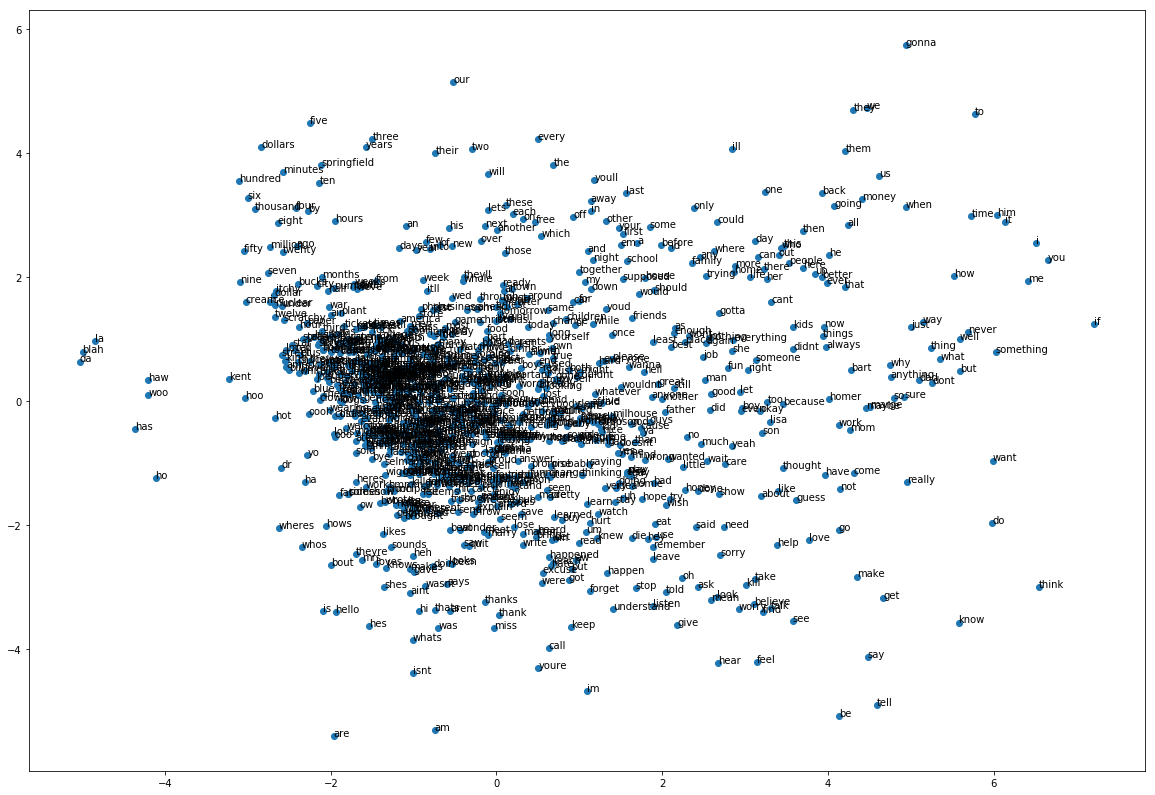

In [12]:
plt.figure(figsize=(20, 14))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(top_n):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))    
plt.show()

In [13]:
### Найти самые близкие слова

In [14]:
#homer - marge + bart
model.most_similar(positive=['homer', 'bart'], negative=['marge'], topn=5)

[('lisa', 0.841242790222168),
 ('milhouse', 0.6977884769439697),
 ('grampa', 0.6793915033340454),
 ('pjs', 0.6535499095916748),
 ('maggie', 0.6528059840202332)]

In [15]:
#bart - lisa + school
model.most_similar(positive=['bart', 'school'], negative=['lisa'], topn=5)

[('house', 0.7892946004867554),
 ('church', 0.7776561379432678),
 ('christmas', 0.7720034122467041),
 ('once', 0.7632393836975098),
 ('town', 0.7522987723350525)]

In [16]:
#marge - homer + home
model.most_similar(positive=['marge', 'home'], negative=['homer'], topn=5)

[('back', 0.8362289071083069),
 ('sleep', 0.741309404373169),
 ('bed', 0.7179925441741943),
 ('away', 0.6891101598739624),
 ('here', 0.67790687084198)]

In [17]:
### 5* попробовать построить классификатор bart/lisa с использованием этих эмбеддингов

In [18]:
df_characters = pd.read_csv("../data/simpsons_characters.csv")
df_characters.sort_values(by='id')[:10]

,id,name,normalized_name,gender
70,1,Marge Simpson,marge simpson,f
6659,2,Homer Simpson,homer simpson,m
74,3,Seymour Skinner,seymour skinner,m
98,4,JANEY,janey,f
89,5,Todd Flanders,todd flanders,m
92,6,Dewey Largo,dewey largo,m
0,7,Children,children,NaN
71,8,Bart Simpson,bart simpson,m
72,9,Lisa Simpson,lisa simpson,f
85,10,Patty Bouvier,patty bouvier,f


In [19]:
#8 - bart - 0 
#9 - list - 1
df[df.character_id.isin(['8','9'])].head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
2,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,true,9,3,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
4,9552,32,212,Lisa Simpson: That life is worth living.,864000,true,9,3,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
8,9556,32,216,Bart Simpson: Victory party under the slide!,882000,true,8,3,Bart Simpson,Springfield Elementary School,Victory party under the slide!,victory party under the slide,5
10,9558,32,218,Lisa Simpson: (CALLING) Mr. Bergstrom! Mr. Ber...,889000,true,9,374,Lisa Simpson,Apartment Building,Mr. Bergstrom! Mr. Bergstrom!,mr bergstrom mr bergstrom,4
12,9560,32,220,Lisa Simpson: Do you know where I could find him?,898000,true,9,374,Lisa Simpson,Apartment Building,Do you know where I could find him?,do you know where i could find him,8


In [20]:
df_bl = df[['character_id', 'normalized_text']][df.character_id.isin(['8','9'])]
df_bl.normalized_text = df_bl.normalized_text.apply(lambda x : x.split())
print(len(list(df_bl.normalized_text)))

24062


In [21]:
embeddings = np.zeros((len(list(df_bl.normalized_text)), 100), dtype=np.float32)

for i, text in enumerate(df_bl.normalized_text):
    embeddings[i] = model[ text ].sum(axis=0)
    
embeddings.shape    

(24062, 100)

In [22]:
columns = [f'emb_{i}' for i in range(100)]
df = pd.DataFrame(data=embeddings, columns=columns)
df['target'] = (df_bl.reset_index()['character_id'] == '9').astype(int)
df.head()

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_91,emb_92,emb_93,emb_94,emb_95,emb_96,emb_97,emb_98,emb_99,target
0,0.984781,-0.655277,-0.366596,0.779367,-1.455475,1.074969,-1.135494,-1.842337,-0.803158,0.270885,...,-2.861935,-0.421247,0.485989,-3.036696,2.585500,1.793727,2.312606,-0.158876,-0.366109,1
1,0.510761,4.074560,-1.892837,-0.185667,0.869286,3.298002,8.589260,-2.062070,-0.920009,1.117215,...,1.831981,-0.236323,1.625971,-1.129021,0.018591,-0.642713,0.323388,2.883011,-0.866608,1
2,-0.474516,2.033782,-0.503983,1.143024,1.592928,0.502408,3.964969,0.669086,0.607622,-0.749827,...,0.195014,0.960191,0.299399,-1.826490,-0.212295,2.638552,0.757330,2.237348,-1.257062,0
3,0.871696,-1.515357,-0.696090,0.293497,-2.431499,0.347873,-2.745172,-3.702337,-0.392676,0.671787,...,-2.518571,-0.475840,1.261685,-5.190566,3.113883,2.534531,4.082112,-0.805009,-0.328870,1
4,-2.821455,3.988402,1.700045,3.611470,0.445265,12.674521,17.423832,-11.950392,3.676224,2.216035,...,8.765850,-8.594508,7.428225,4.269104,3.025093,-0.885397,0.552075,7.448882,-1.016112,1


In [23]:
df.target.value_counts()

0    13185
1    10877
Name: target, dtype: int64

In [24]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [25]:
X = df[columns]
y = df.target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
pool_train = Pool(X_train, label=y_train)
pool_test = Pool(X_test, label=y_test)

In [28]:
cb = CatBoostClassifier(iterations=3000)

In [29]:
cb.fit(pool_train, verbose=False)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(cb.predict(pool_train), y_train)

0.8560444698425892

In [32]:
accuracy_score(cb.predict(pool_test), y_test)

0.5975483066694369